# The Virial Pressure

Ralf Everaers, ENS Lyon (2022)

## Pressure

We have already encountered an estimator of the temperature based on the equipartition theorem for the kinetic energy and the analysis of the instanteneous particle velocities.


A corresponding estimator for the instantaneous pressure in the systems with pair interactions is given by

\begin{equation}
P(t) = P\left(\{\vec r_i(t),\vec v_i(t)\}\right) 
= \frac1{d V} \left[ \sum_i m_i \left|\vec v_i \right|^2 
                    + \sum_{i<j} \vec f_{ij}\cdot\vec r_{ij} \right]
\end{equation}

The above expression applies to homogneous systems and particles interacting via pair potentials and can be conveniently applied for periodic boundary conditions.

In order to link fluctuations of the virial pressure to physical observables we also need to calculate the expectation value of the so-called hypervirial.

If the contribution of pair interactions to the virial pressure can be written as
\begin{equation}
P(t) - P_{id}(t) = \frac1{V}{\cal W}(t)
\end{equation}

with
\begin{eqnarray}
{\cal W}(t) 
&=& \frac1{d}  \sum_{i<j} \vec f_{ij}\cdot\vec r_{ij} \\
&=& -\frac1{d}  \sum_{i<j} \left. r \frac{d\ v(r)}{d r} \right|_{r=r_{ij}}\\
&\equiv& -\frac1{d}  \sum_{i<j} w(r_{ij})
\end{eqnarray}
for the pair potential $v(r)$, 
then the hypervirial has the form
\begin{eqnarray}
{\cal X}(t) 
&=& \frac1{d^2}  \sum_{i<j} \left. r \frac{d\ w(r)}{d r} \right|_{r=r_{ij}}\\
&\equiv& \frac1{d^2}  \sum_{i<j} {\cal x}(r_{ij})
\end{eqnarray}

Reference:

    M. Allen and D. Tildesley, Computer Simulations of Liquids, 2nd Edition, Oxford (2017), pp. 60-69

In the case of the Lennard-Jones interaction:

\begin{eqnarray}
v(r) &=&= 4\epsilon \left(\left(\frac\sigma{r}\right)^{12} - \left(\frac\sigma{r}\right)^6 \right) \\
w(r) &=&= 4\epsilon \left(-12\left(\frac\sigma{r}\right)^{12} +6 \left(\frac\sigma{r}\right)^6 \right) \\
{\cal x}(r) &=&= 4\epsilon \left(12^2\left(\frac\sigma{r}\right)^{12} -6^2 \left(\frac\sigma{r}\right)^6 \right) \\
\end{eqnarray}

In [1]:
# Import standard libraries
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
from matplotlib import animation, cm, colors, rc
import random
import time
from imp import reload
rc('animation', html='html5')

# Import library of our own functions
import MPCMolecularDynamics as MD
reload(MD)

#Include plots into notebook instead of plotting them in extra window
%matplotlib inline 

### Kinetic (ideal gas) pressure

In [2]:
def KineticPressure_as_a_function_of_velocities(d,LBox,m,v,debug=False):
    """
    returns the kinetic contribution to the virial pressure as a function of the particle velocities
    """
    v = np.array(v)
    N = v.shape[-1]
    V = LBox**d
    
    if debug:
        print(N,d,V)
    
    if d==1:
        # sum over particles
        P = np.sum(m*v*v/d/V,axis=-1)   
    else:
        # sum over particles and dimensions
        if debug:
            print(np.sum(m*v*v/d/V,axis=-1).shape)
        P = np.sum( np.sum(m*v*v/d/V,axis=-1), axis=0)       
    return P

Test: The expectation value is given by the ideal gas law

\begin{equation}
\langle P(t) \rangle = \rho k_BT
\end{equation}

In [3]:
NParticles=1000
LBox = 10
kT = 1.
m = np.ones(NParticles)

# a single configuration
vx = MD.RandomVelocities(m,kT)
vy = MD.RandomVelocities(m,kT)

# trajectory: list of configurations
vx_tr = np.array([vx,vx,vx])
vy_tr = np.array([vy,vy,vy])

# ensembles: lists of trajectories
vx_tr_ens = np.array([vx_tr,vx_tr,vx_tr,vx_tr])
vy_tr_ens = np.array([vy_tr,vy_tr,vy_tr,vy_tr])

print("1d kinetic pressure: \n",
      (kT*NParticles/LBox),
      KineticPressure_as_a_function_of_velocities(1,LBox,m,vx))
print("trajectories of 1d pressures: \n",
      (kT*NParticles/LBox),
      KineticPressure_as_a_function_of_velocities(1,LBox,m,vx_tr))
print("ensemble of trajectories of 1d pressures: \n",
      (kT*NParticles/LBox),
      KineticPressure_as_a_function_of_velocities(1,LBox,m,vx_tr_ens))

print("\n")

print("2d kinetic pressure: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_as_a_function_of_velocities(2,LBox,m,(vx,vy)))
print("trajectories of 2d pressures: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_as_a_function_of_velocities(2,LBox,m,(vx_tr,vy_tr)))
print("ensemble of trajectories of 2d pressures: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_as_a_function_of_velocities(2,LBox,m,(vx_tr_ens,vy_tr_ens)))

1d kinetic pressure: 
 100.0 97.7311564079
trajectories of 1d pressures: 
 100.0 [ 97.73115641  97.73115641  97.73115641]
ensemble of trajectories of 1d pressures: 
 100.0 [[ 97.73115641  97.73115641  97.73115641]
 [ 97.73115641  97.73115641  97.73115641]
 [ 97.73115641  97.73115641  97.73115641]
 [ 97.73115641  97.73115641  97.73115641]]


2d kinetic pressure: 
 10.0 9.93413917835
trajectories of 2d pressures: 
 10.0 [ 9.93413918  9.93413918  9.93413918]
ensemble of trajectories of 2d pressures: 
 10.0 [[ 9.93413918  9.93413918  9.93413918]
 [ 9.93413918  9.93413918  9.93413918]
 [ 9.93413918  9.93413918  9.93413918]
 [ 9.93413918  9.93413918  9.93413918]]


In [4]:
def KineticPressure_tensor_as_a_function_of_velocities(d,LBox,m,vel,debug=False):
    """
    returns the kinetic contribution to the pressure tensor as a function of the particle velocities
    """
    v = np.array(vel)
    N = v.shape[-1]
    V = LBox**d
    
    if debug:
        print(N,d,V)
    
    if d==1:
        # sum over particles
        P = np.sum(m*v*v/d/V,axis=-1)   
        return P
    elif d==2:
        # sum over particles
        if debug:
            print(np.sum(m*v*v/d/V,axis=-1).shape)
        Pxx = np.sum(m*v[0]*v[0]/d/V,axis=-1)
        Pxy = np.sum(m*v[0]*v[1]/d/V,axis=-1)
        Pyx = np.sum(m*v[1]*v[0]/d/V,axis=-1)
        Pyy = np.sum(m*v[1]*v[1]/d/V,axis=-1)
        return [[Pxx,Pxy],[Pyx,Pyy]]

    else:
        print("KineticPressure_tensor_as_a_function_of_velocities not defined for d = ",d)

    return

In [5]:
NParticles=1000
LBox = 10
kT = 1.
m = np.ones(NParticles)

# a single configuration
vx = MD.RandomVelocities(m,kT)
vy = MD.RandomVelocities(m,kT)

# trajectory: list of list of distances 
vx_tr = np.array([vx,vx,vx])
vy_tr = np.array([vy,vy,vy])

# ensembles: lists of trajectories
vx_tr_ens = np.array([vx_tr,vx_tr,vx_tr,vx_tr])
vy_tr_ens = np.array([vy_tr,vy_tr,vy_tr,vy_tr])

print("1d kinetic pressure: \n",
      (kT*NParticles/LBox),
      KineticPressure_tensor_as_a_function_of_velocities(1,LBox,m,vx))
print("trajectories of 1d pressures: \n",
      (kT*NParticles/LBox),
      KineticPressure_tensor_as_a_function_of_velocities(1,LBox,m,vx_tr))
print("ensemble of trajectories of 1d pressures: \n",
      (kT*NParticles/LBox),
      KineticPressure_tensor_as_a_function_of_velocities(1,LBox,m,vx_tr_ens))

print("\n")

print("2d kinetic pressure tensor components: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_tensor_as_a_function_of_velocities(2,LBox,m,(vx,vy)))
print("trajectories of 2d pressure tensor components: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_tensor_as_a_function_of_velocities(2,LBox,m,(vx_tr,vy_tr)))
print("ensemble of trajectories of 2d pressure tensor components: \n",
      (kT*NParticles/LBox**2),
      KineticPressure_tensor_as_a_function_of_velocities(2,LBox,m,(vx_tr_ens,vy_tr_ens)))

1d kinetic pressure: 
 100.0 101.577725143
trajectories of 1d pressures: 
 100.0 [ 101.57772514  101.57772514  101.57772514]
ensemble of trajectories of 1d pressures: 
 100.0 [[ 101.57772514  101.57772514  101.57772514]
 [ 101.57772514  101.57772514  101.57772514]
 [ 101.57772514  101.57772514  101.57772514]
 [ 101.57772514  101.57772514  101.57772514]]


2d kinetic pressure tensor components: 
 10.0 [[5.0788862571679605, 0.24679417170200452], [0.24679417170200452, 5.0049130092486216]]
trajectories of 2d pressure tensor components: 
 10.0 [[array([ 5.07888626,  5.07888626,  5.07888626]), array([ 0.24679417,  0.24679417,  0.24679417])], [array([ 0.24679417,  0.24679417,  0.24679417]), array([ 5.00491301,  5.00491301,  5.00491301])]]
ensemble of trajectories of 2d pressure tensor components: 
 10.0 [[array([[ 5.07888626,  5.07888626,  5.07888626],
       [ 5.07888626,  5.07888626,  5.07888626],
       [ 5.07888626,  5.07888626,  5.07888626],
       [ 5.07888626,  5.07888626,  5.07888626]

### Contribution of LJ interactions to the virial pressure

#### Version that calculates the pair virial

Pair virial for a list of distance vectors

In [42]:
def Virial_w_LJ(d,epsilon,sigma,distance_vector,debug=False):
    """
    Lennard-Jones virial in d dimensions
    
    d is the embedding dimension. Needed to distinguish the case of 2 1d distance vectors from 1 2d distance vector.
    
    epsilon is the energy scale of the LJ potential and can be
        a scalar for a single interaction or if all interactions have the same epsilon
        an array of the length of the array of distance vectors
        
    sigma is the interaction range and can be
        a scalar for a single interaction or if all interactions have the same epsilon
        an array of the length of the array of distance vectors

    distance_vector are the instanteneous distances 
        in d = 1 distance_vector = delta_x
        in d>1 distance_vector has to be of the form distance_vector = (delta_x,delta_x) or distance_vector = [delta_x,delta_x]
        where delta_x and delta_y can be    
            a scalar for a single interaction
            an array for several interactions to be evaluated simultaneously

    The function returns -24*epsilon*(2*(sigma/r)**(-12)-(sigma/r)**-6) * distance_vector/r**2 
        where f has the same format as distance_vector
        and r = |distance_vector|
    """
    eps = np.array(epsilon)       
    sig = np.array(sigma)       
    delta_r = np.array(distance_vector)       # array of scalar(d=1) or vector (d>1) distances
    if debug: 
        print(delta_r)
    delta_r_sqr = delta_r**2                              # array of Cartesian components of squared distances
    if d > 1:
        delta_r_sqr = np.sum(delta_r_sqr,axis=0)         # add up Cartesian components in d>1
    relative_inverse_squared_distance = sigma**2/delta_r_sqr
    w = 4*epsilon*(-12*relative_inverse_squared_distance**6 + 6*relative_inverse_squared_distance**3)
    return w

In [51]:
r=2**(1./6)
r=1.2
print("target value: \n",4*(-12*r**(-12)+6*r**-6))

# single distance
x = r
y = 0
print(" \n Single distance 1d \n",
      Virial_w_LJ(1,1,1,x))
print("Single distance 2d \n",
      Virial_w_LJ(2,1,1,(x,y)))

# a configuration or list of distances 
x = [x,x,x,x]
y = [y,y,y,y]
print(" \n Configuration 1d \n",
      Virial_w_LJ(1,1,1,x)[0])
print("Configuration 2d \n",
      Virial_w_LJ(2,1,1,(x,y))[0])

# a trajectory or list of configurations 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print(" \n Trajectory 1d \n",
      Virial_w_LJ(1,1,1,x_tr)[0,0])
print("Trajectory 2d \n",
      Virial_w_LJ(2,1,1,(x_tr,y_tr))[0,0])

# an ensemble or list of trajectories
x_tr_ens = np.array([x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr])
print(" \n Ensemble of trajectories 1d \n",
      Virial_w_LJ(1,1,1,x_tr_ens)[0,0,0])
print("Ensemble of trajectories 2d \n",
      Virial_w_LJ(2,1,1,(x_tr_ens,y_tr_ens))[0,0,0])


target value: 
 2.6540320106676942
 
 Single distance 1d 
 2.65403201067
Single distance 2d 
 2.65403201067
 
 Configuration 1d 
 2.65403201067
Configuration 2d 
 2.65403201067
 
 Trajectory 1d 
 2.65403201067
Trajectory 2d 
 2.65403201067
 
 Ensemble of trajectories 1d 
 2.65403201067
Ensemble of trajectories 2d 
 2.65403201067


Loop over all difference in particle index

In [47]:
def LJ_virial_pressure_as_a_function_of_positions(d,epsilon,sigma,LBox,r,debug=False):
    """
    returns the contribution to the scalar virial pressure resulting from LJ interactions as a function of the particle positions
    """
    r_array = np.array(r)
    N = r_array.shape[-1]
    
    # initialise pressure:
    # one scalar value per system, i.e. same shape as adding up all x-coordinates per system
    if d==1:
        P = 0*np.copy(np.sum(r_array,axis=-1))     
    else:
        P = 0*np.copy(np.sum(r_array[0],axis=-1))  
    
    if debug:
        print("N:",N)
        print("P.shape:",P.shape)
        print("P:",P)
    
    for k in range(1,N):
        delta_r_pair = MD.MinimumImage(LBox,r_array-np.roll(r_array,k,axis=-1))
        wpair = Virial_w_LJ(d,epsilon,sigma,delta_r_pair)
        
        P -= np.sum(wpair,axis=-1)
        
    return P/2/LBox**d/d

In [48]:
NParticles=100
# net forces around missing particle
LBox = 10

# a single configuration
x,y = MD.GridPositionsIn2d(LBox,LBox,NParticles)
print("LJ virial pressure: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x,y)))

# trajectory: list of list of distances 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print("trajectories of LJ virial pressures: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x_tr,y_tr),debug=True))

# ensembles: lists of trajectories
x_tr_ens = np.array([x_tr,x_tr,x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr,y_tr,y_tr])
print("ensemble of trajectories of LJ virial pressures: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x_tr_ens,y_tr_ens)))

LJ virial pressure: 
 20.825944424
N: 100
P.shape: (3,)
P: [ 0.  0.  0.]
trajectories of LJ virial pressures: 
 [ 20.82594442  20.82594442  20.82594442]
ensemble of trajectories of LJ virial pressures: 
 [[ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]]


#### Version that uses the force routine

In [6]:
def LJ_virial_pressure_as_a_function_of_positions(d,epsilon,sigma,LBox,r,debug=False):
    """
    returns the contribution to the scalar virial pressure resulting from LJ interactions as a function of the particle positions
    """
    r_array = np.array(r)
    N = r_array.shape[-1]
    
    # initialise pressure:
    # one scalar value per system, i.e. same shape as adding up all x-coordinates per system
    if d==1:
        P = 0*np.copy(np.sum(r_array,axis=-1))     
    else:
        P = 0*np.copy(np.sum(r_array[0],axis=-1))  
    
    if debug:
        print("N:",N)
        print("P.shape:",P.shape)
        print("P:",P)
    
    for k in range(1,N):
        delta_r_pair = MD.MinimumImage(LBox,r_array-np.roll(r_array,k,axis=-1))
        fpair = MD.f_LJ(d,epsilon,sigma,delta_r_pair)
        if debug and k==1:
            print(delta_r_pair.shape,fpair.shape,(fpair*delta_r_pair).shape)
        if d==1:
            # sum over pair interactions
            P += np.sum(fpair*delta_r_pair,axis=-1)
        else:
            # sum over pair interactions and dimensions 
            P += np.sum( np.sum(fpair*delta_r_pair,axis=-1), axis=0)

    return P/2/LBox**d/d

Test that the function can be directly applied to trajectories or ensembles of trajectories

In [7]:
NParticles=100
# net forces around missing particle
LBox = 10

# a single configuration
x,y = MD.GridPositionsIn2d(LBox,LBox,NParticles)
print("LJ virial pressure: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x,y)))

# trajectory: list of list of distances 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print("trajectories of LJ virial pressures: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x_tr,y_tr)))

# ensembles: lists of trajectories
x_tr_ens = np.array([x_tr,x_tr,x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr,y_tr,y_tr])
print("ensemble of trajectories of LJ virial pressures: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x_tr_ens,y_tr_ens)))

LJ virial pressure: 
 20.825944424
trajectories of LJ virial pressures: 
 [ 20.82594442  20.82594442  20.82594442]
ensemble of trajectories of LJ virial pressures: 
 [[ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]
 [ 20.82594442  20.82594442  20.82594442]]


### Test: nearest neighbor contribution to the LJ pressure for a regular grid with lattice constant $a$

Per particle: 

\begin{equation}
P = \frac1{2 a^2} 2 a f_{LJ}(a) = \frac{f_{LJ}(a)}{a}
\end{equation}

Similarly we have for the energy per particle

\begin{equation}
U/N = 2 u_{LJ}(a)
\end{equation}

On our square grid next nearest neighbors are located at a distance of $\sqrt{2} a$:

\begin{equation}
P += \frac1{2 a^2} 2 (\sqrt{2}a) f_{LJ}(\sqrt{2}a) = \frac{\sqrt{2}f_{LJ}(\sqrt{2}a)}{a}
\end{equation}


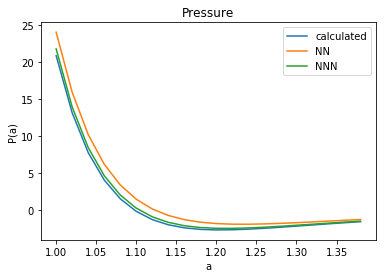

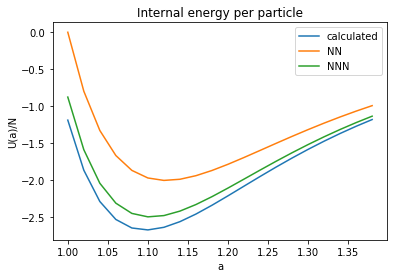

In [8]:
NParticles=100
epsilon=1.
sigma=1.

a_tr = []
# calculated pressure, expected values taking into account nearest neighbor (NN) and next nearest neighbor (NNN) interactions
P_tr = []
PNN_tr = []
PNNN_tr = []
# calculated energy, expected values taking into account nearest neighbor (NN) and next nearest neighbor (NNN) interactions
u_tr = []
uNN_tr = []
uNNN_tr = []

for l in range(20):
    LBox = 10+0.2*l
    a = LBox/np.sqrt(NParticles)
    a_tr.append(a)
    x,y = MD.GridPositionsIn2d(LBox,LBox,NParticles)

    P = LJ_virial_pressure_as_a_function_of_positions(2,epsilon,sigma,LBox,(x,y))
    P_tr.append(P)
    PNN_tr.append(MD.f_LJ(1,epsilon,sigma,a)/a)
    PNNN_tr.append(MD.f_LJ(1,epsilon,sigma,a)/a + np.sqrt(2)*MD.f_LJ(1,epsilon,sigma,a*np.sqrt(2))/a)

    u = np.sum(MD.LJ_energy_as_a_function_of_positions(2,epsilon,sigma,LBox,(x,y)))/NParticles
    u_tr.append(u)
    uNN_tr.append(2*MD.U_LJ(1,epsilon,sigma,a))
    uNNN_tr.append(2*MD.U_LJ(1,epsilon,sigma,a)+2*MD.U_LJ(1,epsilon,sigma,a*np.sqrt(2)))

plt.plot(a_tr,P_tr,label="calculated")
plt.plot(a_tr,PNN_tr,label="NN")
plt.plot(a_tr,PNNN_tr,label="NNN")
plt.title("Pressure")
plt.xlabel("a")
plt.ylabel("P(a)")
plt.legend()
plt.show()

plt.plot(a_tr,u_tr,label="calculated")
plt.plot(a_tr,uNN_tr,label="NN")
plt.plot(a_tr,uNNN_tr,label="NNN")
plt.title("Internal energy per particle")
plt.xlabel("a")
plt.ylabel("U(a)/N")
plt.legend()
plt.show()

## Pressure tensor

In [9]:
def LJ_virial_pressure_tensor_as_a_function_of_positions(d,epsilon,sigma,LBox,r,debug=False):
    """
    returns the contribution to the scalar virial pressure resulting from LJ interactions as a function of the particle positions
    """
    r_array = np.array(r)
    N = r_array.shape[-1]
    
    if d==1:
        P = 0*np.copy(np.sum(r_array,axis=-1))     
        # initialise pressure:
        # one scalar value per system, i.e. same shape as adding up all x-coordinates per system

        for k in range(1,N):

            delta_r_pair = MD.MinimumImage(LBox,r_array-np.roll(r_array,k,axis=-1))
            fpair = MD.f_LJ(d,epsilon,sigma,delta_r_pair)
            
            if debug and k==1:
                print("N:",N)
                print("P.shape:",P.shape)
                print("P:",P)
                print(delta_r_pair.shape,fpair.shape,(fpair*delta_r_pair).shape)

            # sum over pair interactions
            P += np.sum(fpair*delta_r_pair,axis=-1)

        P /= 2*LBox**d*d 
        return P
                    
    if d==2:
        Pxx = 0*np.sum(r_array[0],axis=-1)
        Pxy = 0*np.copy(np.sum(r_array[0],axis=-1))  
        Pyx = 0*np.copy(np.sum(r_array[0],axis=-1))  
        Pyy = 0*np.copy(np.sum(r_array[0],axis=-1))  
        # initialise components of pressure tensor:
        # one scalar value per system, i.e. same shape as adding up all x-coordinates per system

        for k in range(1,N):

            delta_r_pair = MD.MinimumImage(LBox,r_array-np.roll(r_array,k,axis=-1))
            fpair = MD.f_LJ(d,epsilon,sigma,delta_r_pair)
            
            if debug and k==1:
                print("N:",N)
                print("Pxx.shape:",Pxx.shape)
                print("Pxx:",Pxx)
                print(delta_r_pair.shape,fpair.shape,(fpair*delta_r_pair).shape)

            # sum over pair interactions and dimensions 
            Pxx += np.sum(fpair[0]*delta_r_pair[0],axis=-1)
            Pxy += np.sum(fpair[0]*delta_r_pair[1],axis=-1)
            Pyx += np.sum(fpair[1]*delta_r_pair[0],axis=-1)
            Pyy += np.sum(fpair[1]*delta_r_pair[1],axis=-1)

        Pxx /= 2*LBox**d*d   
        Pxy /= 2*LBox**d*d  
        Pyx /= 2*LBox**d*d   
        Pyy /= 2*LBox**d*d 
        
        return [[Pxx,Pxy],[Pyx,Pyy]]
        
    else:
        print("LJ_virial_pressure_tensor_as_a_function_of_positions not defined for d = ",d)

    return

In [10]:
NParticles=100
# net forces around missing particle
LBox = 10

# a single configuration
x,y = MD.GridPositionsIn2d(LBox,LBox,NParticles)
print("LJ pressure: \n",LJ_virial_pressure_as_a_function_of_positions(2,1.,1.,LBox,(x,y)))
print("LJ pressure tensor: \n",LJ_virial_pressure_tensor_as_a_function_of_positions(2,1.,1.,LBox,(x,y)))

# trajectory: list of list of distances 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print("trajectories of LJ pressure tensor components: \n",LJ_virial_pressure_tensor_as_a_function_of_positions(2,1.,1.,LBox,(x_tr,y_tr)))

# ensembles: lists of trajectories
x_tr_ens = np.array([x_tr,x_tr,x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr,y_tr,y_tr])
print("ensemble of trajectories of LJ pressure tensor components: \n",LJ_virial_pressure_tensor_as_a_function_of_positions(2,1.,1.,LBox,(x_tr_ens,y_tr_ens)))

LJ pressure: 
 20.825944424
LJ pressure tensor: 
 [[10.412972211975111, -3.552713678800501e-17], [-3.552713678800501e-17, 10.412972211975118]]
trajectories of LJ pressure tensor components: 
 [[array([ 10.41297221,  10.41297221,  10.41297221]), array([ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17])], [array([ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17]), array([ 10.41297221,  10.41297221,  10.41297221])]]
ensemble of trajectories of LJ pressure tensor components: 
 [[array([[ 10.41297221,  10.41297221,  10.41297221],
       [ 10.41297221,  10.41297221,  10.41297221],
       [ 10.41297221,  10.41297221,  10.41297221],
       [ 10.41297221,  10.41297221,  10.41297221]]), array([[ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17],
       [ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17],
       [ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17],
       [ -3.55271368e-17,  -3.55271368e-17,  -3.55271368e-17]])], [array([[ -3.55271368e-17,  -3.55271368e-17,  -3.55

### Converting trajectories of tensor components into a trajectory of tensors

Applying these functions to an (ensemble) of trajectories produces distinct (ensembles) of trajectories for the time evolution of the components Pxx_tr_ens, etc. of the pressure tensor.

To convert them into (ensembles) of trajectories of the time evolution of the pressure tensor, we need to rearange the indices in a NumPy array

In [11]:
((Pxx_tr,Pxy_tr),(Pyx_tr,Pyy_tr)) = LJ_virial_pressure_tensor_as_a_function_of_positions(2,1.,1.,LBox,(x_tr,y_tr))

print([[Pxx_tr[0],Pxy_tr[0]],[Pyx_tr[0],Pyy_tr[0]]])

P_tensor_tr = np.transpose(np.array(((Pxx_tr,Pxy_tr),(Pyx_tr,Pyy_tr))),(-1,0,1))

print(P_tensor_tr[0])

[[10.412972211975111, -3.552713678800501e-17], [-3.552713678800501e-17, 10.412972211975118]]
[[  1.04129722e+01  -3.55271368e-17]
 [ -3.55271368e-17   1.04129722e+01]]


In [12]:
((Pxx_tr_ens,Pxy_tr_ens),(Pyx_tr_ens,Pyy_tr_ens)) = LJ_virial_pressure_tensor_as_a_function_of_positions(2,1.,1.,LBox,(x_tr_ens,y_tr_ens))

print([[Pxx_tr_ens[0,0],Pxy_tr_ens[0,0]],[Pyx_tr_ens[0,0],Pyy_tr_ens[0,0]]])

P_tensor_tr_ens = np.transpose(np.array( ((Pxx_tr_ens,Pxy_tr_ens),(Pyx_tr_ens,Pyy_tr_ens)) ),(-2,-1,0,1))

P_tensor_tr_ens[0,0]

[[10.412972211975111, -3.552713678800501e-17], [-3.552713678800501e-17, 10.412972211975118]]


array([[  1.04129722e+01,  -3.55271368e-17],
       [ -3.55271368e-17,   1.04129722e+01]])

# The hypervirial

In the case of the Lennard-Jones interaction:

\begin{eqnarray}
v(r) &=&= 4\epsilon \left(\left(\frac\sigma{r}\right)^{12} - \left(\frac\sigma{r}\right)^6 \right) \\
w(r) &=&= 4\epsilon \left(-12\left(\frac\sigma{r}\right)^{12} +6 \left(\frac\sigma{r}\right)^6 \right) \\
{\cal x}(r) &=&= 4\epsilon \left(12^2\left(\frac\sigma{r}\right)^{12} -6^2 \left(\frac\sigma{r}\right)^6 \right) \\
\end{eqnarray}

### Contribution of LJ interactions to the hypervirial

In [49]:
def HyperVirial_x_LJ(d,epsilon,sigma,distance_vector,debug=False):
    """
    Lennard-Jones hyper virial in d dimensions
    
    d is the embedding dimension. Needed to distinguish the case of 2 1d distance vectors from 1 2d distance vector.
    
    epsilon is the energy scale of the LJ potential and can be
        a scalar for a single interaction or if all interactions have the same epsilon
        an array of the length of the array of distance vectors
        
    sigma is the interaction range and can be
        a scalar for a single interaction or if all interactions have the same epsilon
        an array of the length of the array of distance vectors

    distance_vector are the instanteneous distances 
        in d = 1 distance_vector = delta_x
        in d>1 distance_vector has to be of the form distance_vector = (delta_x,delta_x) or distance_vector = [delta_x,delta_x]
        where delta_x and delta_y can be    
            a scalar for a single interaction
            an array for several interactions to be evaluated simultaneously

    The function returns -24*epsilon*(2*(sigma/r)**(-12)-(sigma/r)**-6) * distance_vector/r**2 
        where f has the same format as distance_vector
        and r = |distance_vector|
    """
    eps = np.array(epsilon)       
    sig = np.array(sigma)       
    delta_r = np.array(distance_vector)       # array of scalar(d=1) or vector (d>1) distances
    if debug: 
        print(delta_r)
    delta_r_sqr = delta_r**2                              # array of Cartesian components of squared distances
    if d > 1:
        delta_r_sqr = np.sum(delta_r_sqr,axis=0)         # add up Cartesian components in d>1
    relative_inverse_squared_distance = sigma**2/delta_r_sqr
    x = 4*epsilon*(144*relative_inverse_squared_distance**6 - 36*relative_inverse_squared_distance**3)
    return x

In [50]:
r=2**(1./6)
r=1.2
print("target value: \n",4*(12**2 *r**(-12) - 6**2*r**-6))

# single distance
x = r
y = 0
print(" \n Single distance 1d \n",
      HyperVirial_x_LJ(1,1,1,x))
print("Single distance 2d \n",
      HyperVirial_x_LJ(2,1,1,(x,y)))

# a configuration or list of distances 
x = [x,x,x,x]
y = [y,y,y,y]
print(" \n Configuration 1d \n",
      HyperVirial_x_LJ(1,1,1,x)[0])
print("Configuration 2d \n",
      HyperVirial_x_LJ(2,1,1,(x,y))[0])

# a trajectory or list of configurations 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print(" \n Trajectory 1d \n",
      HyperVirial_x_LJ(1,1,1,x_tr)[0,0])
print("Trajectory 2d \n",
      HyperVirial_x_LJ(2,1,1,(x_tr,y_tr))[0,0])

# an ensemble or list of trajectories
x_tr_ens = np.array([x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr])
print(" \n Ensemble of trajectories 1d \n",
      HyperVirial_x_LJ(1,1,1,x_tr_ens)[0,0,0])
print("Ensemble of trajectories 2d \n",
      HyperVirial_x_LJ(2,1,1,(x_tr_ens,y_tr_ens))[0,0,0])


target value: 
 16.376924513962997
 
 Single distance 1d 
 16.376924514
Single distance 2d 
 16.376924514
 
 Configuration 1d 
 16.376924514
Configuration 2d 
 16.376924514
 
 Trajectory 1d 
 16.376924514
Trajectory 2d 
 16.376924514
 
 Ensemble of trajectories 1d 
 16.376924514
Ensemble of trajectories 2d 
 16.376924514


In [52]:
def LJ_hyper_virial_as_a_function_of_positions(d,epsilon,sigma,LBox,r,debug=False):
    """
    returns the contribution to the scalar hyper virial resulting from LJ interactions as a function of the particle positions
    """
    r_array = np.array(r)
    N = r_array.shape[-1]
    
    # initialise pressure:
    # one scalar value per system, i.e. same shape as adding up all x-coordinates per system
    if d==1:
        P = 0*np.copy(np.sum(r_array,axis=-1))     
    else:
        P = 0*np.copy(np.sum(r_array[0],axis=-1))  
    
    if debug:
        print("N:",N)
        print("P.shape:",P.shape)
        print("P:",P)
    
    for k in range(1,N):
        delta_r_pair = MD.MinimumImage(LBox,r_array-np.roll(r_array,k,axis=-1))
        xpair = HyperVirial_x_LJ(d,epsilon,sigma,delta_r_pair)
        
        P += np.sum(xpair,axis=-1)
        
    return P/2/LBox**d/d**2

Test that the function can be directly applied to trajectories or ensembles of trajectories

In [54]:
NParticles=100
# net forces around missing particle
LBox = 10

# a single configuration
x,y = MD.GridPositionsIn2d(LBox,LBox,NParticles)
print("LJ virial pressure: \n",LJ_hyper_virial_as_a_function_of_positions(2,1.,1.,LBox,(x,y)))

# trajectory: list of list of distances 
x_tr = np.array([x,x,x])
y_tr = np.array([y,y,y])
print("trajectories of LJ virial pressures: \n",LJ_hyper_virial_as_a_function_of_positions(2,1.,1.,LBox,(x_tr,y_tr)))

# ensembles: lists of trajectories
x_tr_ens = np.array([x_tr,x_tr,x_tr,x_tr])
y_tr_ens = np.array([y_tr,y_tr,y_tr,y_tr])
print("ensemble of trajectories of LJ virial pressures: \n",LJ_hyper_virial_as_a_function_of_positions(2,1.,1.,LBox,(x_tr_ens,y_tr_ens)))

LJ virial pressure: 
 208.782621158
trajectories of LJ virial pressures: 
 [ 208.78262116  208.78262116  208.78262116]
ensemble of trajectories of LJ virial pressures: 
 [[ 208.78262116  208.78262116  208.78262116]
 [ 208.78262116  208.78262116  208.78262116]
 [ 208.78262116  208.78262116  208.78262116]
 [ 208.78262116  208.78262116  208.78262116]]
